In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

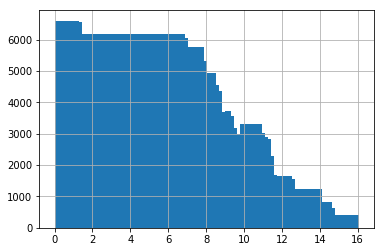

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


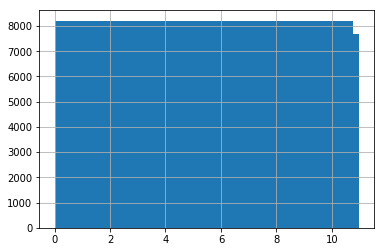

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [29]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [30]:
best_mae=1e10

In [31]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(5*1e-3),np.log(0.1) ),
}

In [39]:
def objective(args):
    print args
    return lgbcv(**args)



In [40]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 120.78789788537841, 'reg_alpha': 3.3851818900639326, 'colsample_bytree': 0.6584627977457247, 'min_sum_hessian_in_leaf': 1.2982793545354965, 'learning_rate': 0.011198748102456727, 'subsample': 0.7149547243727166, 'reg_lambda': 0.4751327131485799, 'min_data_in_leaf': 5.222414168273001, 'max_depth': 3.275584015704559}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.52546	valid_1's l1: 1.69782   
[200]	training's l1: 1.22171	valid_1's l1: 1.36278   
[300]	training's l1: 1.1376	valid_1's l1: 1.24738    
[400]	training's l1: 1.10879	valid_1's l1: 1.20944   
[500]	training's l1: 1.09245	valid_1's l1: 1.19679   
[600]	train

[100]	training's l1: 1.52751	valid_1's l1: 1.62206   
[200]	training's l1: 1.2213	valid_1's l1: 1.35838    
[300]	training's l1: 1.13668	valid_1's l1: 1.30843   
[400]	training's l1: 1.1067	valid_1's l1: 1.3062     
[500]	training's l1: 1.09072	valid_1's l1: 1.30305   
[600]	training's l1: 1.07969	valid_1's l1: 1.30188   
[700]	training's l1: 1.0699	valid_1's l1: 1.30244    
Early stopping, best iteration is:                   
[611]	training's l1: 1.07845	valid_1's l1: 1.30111
quake                                                
8                                                    
(1.3011144293846932, 611)                            
valid quake                                          
9                                                    
(384759, 450)                                        
(384759,)                                            
(24635, 450)                                         
(24635,)                                             
Training until validation score

[400]	training's l1: 1.11764	valid_1's l1: 1.1134    
Early stopping, best iteration is:                   
[349]	training's l1: 1.12979	valid_1's l1: 1.10998
quake                                                
15                                                   
(1.10998392604625, 349)                              
mean score                                           
1.1737734999373248                                   
{'num_leaves': 61.552653085964636, 'reg_alpha': 3.8079997938418053, 'colsample_bytree': 0.9403344945904997, 'min_sum_hessian_in_leaf': 0.007279216747586697, 'learning_rate': 0.07125553497115708, 'subsample': 0.8332410684445921, 'reg_lambda': 0.47416430710628243, 'min_data_in_leaf': 2855.9848338176653, 'max_depth': 7.819354521435475}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 

(389202, 450)                                                                 
(389202,)                                                                     
(20192, 450)                                                                  
(20192,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.965836	valid_1's l1: 1.32555                           
Early stopping, best iteration is:                                            
[39]	training's l1: 1.06939	valid_1's l1: 1.3042
quake                                                                         
8                                                                             
(1.3042045391282453, 39)                                                      
valid quake                                                                   
9                                                                             
(38

valid quake                                                                  
1                                                                            
(379874, 450)                                                                
(379874,)                                                                    
(29520, 450)                                                                 
(29520,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.80094	valid_1's l1: 1.93938                           
[200]	training's l1: 1.39139	valid_1's l1: 1.56784                           
[300]	training's l1: 1.21626	valid_1's l1: 1.37563                           
[400]	training's l1: 1.13707	valid_1's l1: 1.27715                           
[500]	training's l1: 1.09844	valid_1's l1: 1.22967                           
[600]	training's l1: 1.07636	valid_1's l1: 1.20695              

(391376, 450)                                                                
(391376,)                                                                    
(18018, 450)                                                                 
(18018,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.80677	valid_1's l1: 1.89052                           
[200]	training's l1: 1.39719	valid_1's l1: 1.56259                           
[300]	training's l1: 1.21889	valid_1's l1: 1.44754                           
[400]	training's l1: 1.13764	valid_1's l1: 1.40223                           
[500]	training's l1: 1.09807	valid_1's l1: 1.38298                           
[600]	training's l1: 1.07604	valid_1's l1: 1.37548                           
[700]	training's l1: 1.06135	valid_1's l1: 1.3684                            
[800]	training's l1: 1.05006	valid_1's l1: 1.36784              

[1400]	training's l1: 1.01261	valid_1's l1: 1.0665                           
[1500]	training's l1: 1.00582	valid_1's l1: 1.06648                          
[1600]	training's l1: 0.998974	valid_1's l1: 1.06569                         
[1700]	training's l1: 0.992307	valid_1's l1: 1.06526                         
[1800]	training's l1: 0.985694	valid_1's l1: 1.06502                         
[1900]	training's l1: 0.979602	valid_1's l1: 1.06424                         
[2000]	training's l1: 0.973432	valid_1's l1: 1.06353                         
[2100]	training's l1: 0.967351	valid_1's l1: 1.06293                         
[2200]	training's l1: 0.961401	valid_1's l1: 1.06225                         
[2300]	training's l1: 0.955594	valid_1's l1: 1.06096                         
[2400]	training's l1: 0.949345	valid_1's l1: 1.06025                         
[2500]	training's l1: 0.94343	valid_1's l1: 1.05998                          
[2600]	training's l1: 0.937795	valid_1's l1: 1.05877            

[1400]	training's l1: 0.977191	valid_1's l1: 1.4832                          
[1500]	training's l1: 0.970278	valid_1's l1: 1.48269                         
[1600]	training's l1: 0.96318	valid_1's l1: 1.48224                          
Early stopping, best iteration is:                                           
[1562]	training's l1: 0.965777	valid_1's l1: 1.48188
quake                                                                        
14                                                                           
(1.481875597158469, 1562)                                                    
valid quake                                                                  
15                                                                           
(385215, 450)                                                                
(385215,)                                                                    
(24179, 450)                                                                 
(24179,)   

4                                                                             
(1.1975471445998305, 599)                                                     
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.57639	valid_1's l1: 1.62813                            
[200]	training's l1: 1.25205	valid_1's l1: 1.35627                            
[300]	training's l1: 1.15592	valid_1's l1: 1.31013                            
[400]	training's l1: 1.12333	valid_1's l1: 1.30546  

[100]	training's l1: 1.58898	valid_1's l1: 1.52914                              
[200]	training's l1: 1.26624	valid_1's l1: 1.21211                              
[300]	training's l1: 1.17042	valid_1's l1: 1.12453                              
[400]	training's l1: 1.13569	valid_1's l1: 1.10055                              
[500]	training's l1: 1.11858	valid_1's l1: 1.09022                              
[600]	training's l1: 1.10684	valid_1's l1: 1.08585                              
[700]	training's l1: 1.09833	valid_1's l1: 1.0837                               
[800]	training's l1: 1.09052	valid_1's l1: 1.08141                              
[900]	training's l1: 1.08359	valid_1's l1: 1.08041                              
[1000]	training's l1: 1.07671	valid_1's l1: 1.0785                              
[1100]	training's l1: 1.07063	valid_1's l1: 1.07723                             
[1200]	training's l1: 1.0642	valid_1's l1: 1.07521                              
[1300]	training's l1: 1.0588

[300]	training's l1: 1.13276	valid_1's l1: 1.54861                              
[400]	training's l1: 1.09909	valid_1's l1: 1.5197                               
[500]	training's l1: 1.08279	valid_1's l1: 1.50824                              
[600]	training's l1: 1.07216	valid_1's l1: 1.50098                              
[700]	training's l1: 1.06341	valid_1's l1: 1.4972                               
[800]	training's l1: 1.05548	valid_1's l1: 1.49573                              
[900]	training's l1: 1.04766	valid_1's l1: 1.49395                              
[1000]	training's l1: 1.04045	valid_1's l1: 1.49086                             
[1100]	training's l1: 1.03436	valid_1's l1: 1.48986                             
[1200]	training's l1: 1.0277	valid_1's l1: 1.48839                              
[1300]	training's l1: 1.02196	valid_1's l1: 1.48748                             
[1400]	training's l1: 1.01611	valid_1's l1: 1.488                               
Early stopping, best iterati

(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.11308	valid_1's l1: 1.31991                              
Early stopping, best iteration is:                                              
[89]	training's l1: 1.12271	valid_1's l1: 1.31748
quake                                                                           
5                                                                               
(1.3174761787666491, 89)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                               

(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12771	valid_1's l1: 0.928745                             
[200]	training's l1: 1.08171	valid_1's l1: 0.930323                             
Early stopping, best iteration is:                                              
[123]	training's l1: 1.11199	valid_1's l1: 0.924584
quake                                                                           
12                                                                              
(0.9245843940107963, 123)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                

valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0315	valid_1's l1: 1.21045                              
[200]	training's l1: 0.859216	valid_1's l1: 1.1515                             
[300]	training's l1: 0.794362	valid_1's l1: 1.15067                            
Early stopping, best iteration is:                                             
[239]	training's l1: 0.831102	valid_1's l1: 1.14939
quake                                                               

(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03553	valid_1's l1: 1.13202                             
[200]	training's l1: 0.860581	valid_1's l1: 1.07963                            
[300]	training's l1: 0.79334	valid_1's l1: 1.08323                             
Early stopping, best iteration is:                                             
[231]	training's l1: 0.840123	valid_1's l1: 1.07925
quake                                                                          
11                                                                             
(1.079249230946047, 231)                                                       
valid quake                                                         

(1.3523310577634253, 282)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.09988	valid_1's l1: 0.823086                            
Early stopping, best iteration is:                                             
[97]	training's l1: 1.10348	valid_1's l1: 0.822432
quake                                                                          
3                                                                    

(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08968	valid_1's l1: 1.08752                             
[200]	training's l1: 1.02693	valid_1's l1: 1.06999                             
[300]	training's l1: 0.987098	valid_1's l1: 1.06466                            
[400]	training's l1: 0.951954	valid_1's l1: 1.06372                            
[500]	training's l1: 0.920644	valid_1's l1: 1.06086                            
Early stopping, best iteration is:                                             
[499]	training's l1: 0.921033	valid_1's l1: 1.06063
quake                                                                          
10                                                                             
(1.0606295199188753, 499)                                           

1                                                                              
(1.1939480033529595, 266)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.09424	valid_1's l1: 1.40408                             
[200]	training's l1: 1.04017	valid_1's l1: 1.37405                             
[300]	training's l1: 1.01174	valid_1's l1: 1.37506                             
Early stopping, best iteration is:      

(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12732	valid_1's l1: 0.963876                            
[200]	training's l1: 1.07054	valid_1's l1: 0.96115                             
Early stopping, best iteration is:                                             
[148]	training's l1: 1.08886	valid_1's l1: 0.951161
quake                                                                          
9                                                                              
(0.9511611865061936, 148)                                                      
valid quake                                                                    
10                                                                  

valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.63473	valid_1's l1: 1.79613                             
[200]	training's l1: 1.23818	valid_1's l1: 1.42723                             
[300]	training's l1: 1.0943	valid_1's l1: 1.27353                              
[400]	training's l1: 1.03227	valid_1's l1: 1.21365                             
[500]	training's l1: 0.99674	valid_1's l1: 1.19126                             
[600]	training's l1: 0.9726	valid_1's l1

quake                                                                          
6                                                                              
(1.356054810817508, 642)                                                       
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.6247	valid_1's l1: 1.8949                               
[200]	training's l1: 1.22415	valid_1's l1: 1.58063                             
[300]	training's l1: 1.07778	valid_1's l

(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.6513	valid_1's l1: 1.46259                              
[200]	training's l1: 1.2574	valid_1's l1: 1.0482                               
[300]	training's l1: 1.11175	valid_1's l1: 0.942247                            
[400]	training's l1: 1.0483	valid_1's l1: 0.925803                             
[500]	training's l1: 1.0106	valid_1's l1: 0.925769                             
Early stopping, best iteration is:                                             
[453]	training's l1: 1.02641	valid_1's l1: 0.924887
quake                                                                          
12                                                                             
(0.9248867215022846, 453)                                           

(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.00541	valid_1's l1: 0.833189                             
Early stopping, best iteration is:                                              
[64]	training's l1: 1.07884	valid_1's l1: 0.819747
quake                                                                           
3                                                                               
(0.8197470978809219, 64)                                                        
valid quake                                                                     
4                                                         

Early stopping, best iteration is:                                              
[179]	training's l1: 0.940811	valid_1's l1: 1.07726
quake                                                                           
10                                                                              
(1.0772636859677909, 179)                                                       
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.994311	valid_1's l1: 1.07257      

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.38117	valid_1's l1: 1.71839                              
[200]	training's l1: 1.04807	valid_1's l1: 1.44647                              
[300]	training's l1: 0.949543	valid_1's l1: 1.37799                             
[400]	training's l1: 0.900331	valid_1's l1: 1.36232                             
[500]	training's l1: 0.869639	valid_1's l1: 1.35429                             
[600]	training's l1: 0.843119	valid_1's l1: 1.3528                              
Early stopping, best iteration is:                                              
[578]	training's l1: 0.848972	valid_1's l1: 1.35241
quake                                                                           
2                                                                               
(1.3524081300842434, 578)                                                       
valid quake                                              

[200]	training's l1: 1.063	valid_1's l1: 1.30178                                
[300]	training's l1: 0.961852	valid_1's l1: 1.29427                             
Early stopping, best iteration is:                                              
[255]	training's l1: 0.997379	valid_1's l1: 1.29095
quake                                                                           
8                                                                               
(1.290954260578464, 255)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                 

[100]	training's l1: 1.37353	valid_1's l1: 1.74161                              
[200]	training's l1: 1.03979	valid_1's l1: 1.53713                              
[300]	training's l1: 0.9392	valid_1's l1: 1.49436                               
[400]	training's l1: 0.888527	valid_1's l1: 1.48416                             
[500]	training's l1: 0.856656	valid_1's l1: 1.48208                             
Early stopping, best iteration is:                                              
[494]	training's l1: 0.85805	valid_1's l1: 1.48166
quake                                                                           
14                                                                              
(1.4816564798993521, 494)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                             

(391376,)                                                                        
(18018, 450)                                                                     
(18018,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.825247	valid_1's l1: 1.34811                              
Early stopping, best iteration is:                                               
[93]	training's l1: 0.838778	valid_1's l1: 1.34733
quake                                                                            
6                                                                                
(1.3473254006029487, 93)                                                         
valid quake                                                                      
7                                                                                
(368154, 450)                                  

13                                                                               
(1.0543585115840615, 75)                                                         
valid quake                                                                      
14                                                                               
(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.797083	valid_1's l1: 1.48263                              
[200]	training's l1: 0.662642	valid_1's l1: 1.48641                              
Early stopping, best iteration is:                                               
[132]	training's

[200]	training's l1: 0.719508	valid_1's l1: 1.34489                             
Early stopping, best iteration is:                                              
[120]	training's l1: 0.846787	valid_1's l1: 1.33425
quake                                                                           
5                                                                               
(1.3342545590622048, 120)                                                       
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 ro

12                                                                              
(0.9299747476074566, 127)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.909068	valid_1's l1: 1.0596                              
[200]	training's l1: 0.724297	valid_1's l1: 1.06027                             
Early stopping, best iteration is:                                              
[134]	training's l1: 0.82601

4                                                                                
(1.1721194015472278, 75)                                                         
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.820287	valid_1's l1: 1.32159                              
Early stopping, best iteration is:                                               
[46]	training's l1: 0.981458	valid_1's l1: 1.29983
quake                                          

Early stopping, best iteration is:                                               
[54]	training's l1: 0.955902	valid_1's l1: 0.942511
quake                                                                            
12                                                                               
(0.9425107473182708, 54)                                                         
valid quake                                                                      
13                                                                               
(387509, 450)                                                                    
(387509,)                                                                        
(21885, 450)                                                                     
(21885,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.832521	valid_1's l1: 1.

[200]	training's l1: 1.05274	valid_1's l1: 1.19064                              
[300]	training's l1: 1.01589	valid_1's l1: 1.18704                              
[400]	training's l1: 0.984797	valid_1's l1: 1.18746                             
Early stopping, best iteration is:                                              
[362]	training's l1: 0.995977	valid_1's l1: 1.18409
quake                                                                           
4                                                                               
(1.1840882836503746, 362)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                             

(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.13192	valid_1's l1: 1.1054                               
[200]	training's l1: 1.0558	valid_1's l1: 1.08697                               
Early stopping, best iteration is:                                              
[187]	training's l1: 1.06123	valid_1's l1: 1.08534
quake                                                                           
11                                                                              
(1.0853440254189506, 187)                                                       
valid quake                                                                     
12                                                        

(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48546	valid_1's l1: 1.74385                              
[200]	training's l1: 1.1695	valid_1's l1: 1.47453                               
[300]	training's l1: 1.08394	valid_1's l1: 1.39483                              
[400]	training's l1: 1.05316	valid_1's l1: 1.37233                              
[500]	training's l1: 1.03782	valid_1's l1: 1.3668                               
[600]	training's l1: 1.02692	valid_1's l1: 1.36583                              
[700]	training's l1: 1.01551	valid_1's l1: 1.36658                              
Early stopping, best iteration is:                                              
[630]	training's l1: 1.02327	valid_1's l1: 1.3651
quake                                                                           
2                                                          

[800]	training's l1: 0.998598	valid_1's l1: 1.40454                             
[900]	training's l1: 0.98949	valid_1's l1: 1.40359                              
Early stopping, best iteration is:                                              
[894]	training's l1: 0.98998	valid_1's l1: 1.40356
quake                                                                           
7                                                                               
(1.40356277418367, 894)                                                         
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                  

[200]	training's l1: 1.19598	valid_1's l1: 1.11609                              
[300]	training's l1: 1.10952	valid_1's l1: 1.07362                              
[400]	training's l1: 1.07831	valid_1's l1: 1.06766                              
[500]	training's l1: 1.06219	valid_1's l1: 1.06478                              
[600]	training's l1: 1.05091	valid_1's l1: 1.06347                              
[700]	training's l1: 1.04076	valid_1's l1: 1.06212                              
[800]	training's l1: 1.03059	valid_1's l1: 1.06192                              
Early stopping, best iteration is:                                              
[776]	training's l1: 1.03315	valid_1's l1: 1.06118
quake                                                                           
13                                                                              
(1.061184926866825, 776)                                                        
valid quake                                               

quake                                                                           
4                                                                               
(1.1775423792938489, 85)                                                        
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.02008	valid_1's l1: 1.3429                               
Early stopping, best iteration is:                                              
[61]	training's l1: 1.05833	

(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.03032	valid_1's l1: 0.9319                               
Early stopping, best iteration is:                                              
[64]	training's l1: 1.0673	valid_1's l1: 0.926311
quake                                                                           
12                                                                              
(0.9263113486197468, 64)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                              

3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.72905	valid_1's l1: 1.49366                              
[200]	training's l1: 1.33235	valid_1's l1: 0.995931                             
[300]	training's l1: 1.17561	valid_1's l1: 0.843293                             
[400]	training's l1: 1.10725	valid_1's l1: 0.813408                             
[500]	training's l1: 1.07277	valid_1's l1: 0.819152                             
Early stopping, best iteration is:                                              
[415]	training's l1: 1.10092

[300]	training's l1: 1.15219	valid_1's l1: 1.31407                              
[400]	training's l1: 1.08542	valid_1's l1: 1.29183                              
[500]	training's l1: 1.05046	valid_1's l1: 1.29501                              
Early stopping, best iteration is:                                              
[432]	training's l1: 1.07201	valid_1's l1: 1.29145
quake                                                                           
8                                                                               
(1.2914506117225835, 432)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                              

[500]	training's l1: 1.06336	valid_1's l1: 1.06087                              
[600]	training's l1: 1.04503	valid_1's l1: 1.05795                              
[700]	training's l1: 1.03393	valid_1's l1: 1.05746                              
[800]	training's l1: 1.0246	valid_1's l1: 1.05664                               
Early stopping, best iteration is:                                              
[775]	training's l1: 1.0272	valid_1's l1: 1.0564
quake                                                                           
13                                                                              
(1.0563952652882436, 775)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                   

[200]	training's l1: 0.711117	valid_1's l1: 1.14212                             
[300]	training's l1: 0.606803	valid_1's l1: 1.14538                             
Early stopping, best iteration is:                                              
[246]	training's l1: 0.660037	valid_1's l1: 1.14103
quake                                                                           
4                                                                               
(1.1410259152350544, 246)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                 

quake                                                                           
11                                                                              
(1.0813193648604604, 167)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.883826	valid_1's l1: 0.924252                            
[200]	training's l1: 0.716782	valid_1's l1: 0.935145                            
Early stopping, best iterati

[300]	training's l1: 1.21784	valid_1's l1: 1.49512                              
[400]	training's l1: 1.14722	valid_1's l1: 1.43039                              
[500]	training's l1: 1.11445	valid_1's l1: 1.40292                              
[600]	training's l1: 1.09572	valid_1's l1: 1.38517                              
[700]	training's l1: 1.0843	valid_1's l1: 1.37656                               
[800]	training's l1: 1.07536	valid_1's l1: 1.37223                              
[900]	training's l1: 1.06812	valid_1's l1: 1.37154                              
[1000]	training's l1: 1.06147	valid_1's l1: 1.36971                             
[1100]	training's l1: 1.05563	valid_1's l1: 1.36925                             
[1200]	training's l1: 1.05033	valid_1's l1: 1.36895                             
Early stopping, best iteration is:                                              
[1184]	training's l1: 1.05112	valid_1's l1: 1.36859
quake                                                    

[300]	training's l1: 1.21702	valid_1's l1: 1.51235                              
[400]	training's l1: 1.14641	valid_1's l1: 1.45642                              
[500]	training's l1: 1.11247	valid_1's l1: 1.42915                              
[600]	training's l1: 1.0945	valid_1's l1: 1.41778                               
[700]	training's l1: 1.08197	valid_1's l1: 1.41341                              
[800]	training's l1: 1.07243	valid_1's l1: 1.41025                              
[900]	training's l1: 1.06453	valid_1's l1: 1.40907                              
[1000]	training's l1: 1.05764	valid_1's l1: 1.40894                             
[1100]	training's l1: 1.05076	valid_1's l1: 1.40648                             
[1200]	training's l1: 1.04444	valid_1's l1: 1.40576                             
Early stopping, best iteration is:                                              
[1170]	training's l1: 1.04641	valid_1's l1: 1.40519
quake                                                    

[1200]	training's l1: 1.07709	valid_1's l1: 1.06417                             
[1300]	training's l1: 1.07176	valid_1's l1: 1.06358                             
Early stopping, best iteration is:                                              
[1283]	training's l1: 1.07255	valid_1's l1: 1.06353
quake                                                                           
11                                                                              
(1.0635284343146236, 1283)                                                      
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                 

quake                                                                           
15                                                                              
(1.117441333206734, 745)                                                        
mean score                                                                      
1.1752463115842957                                                              
{'num_leaves': 95.0996861969958, 'reg_alpha': 1.1160895342211097, 'colsample_bytree': 0.7600023234267657, 'min_sum_hessian_in_leaf': 0.3309826493580053, 'learning_rate': 0.016596630293584737, 'subsample': 0.5485778933976526, 'reg_lambda': 0.14154679612165844, 'min_data_in_leaf': 25.82957700514415, 'max_depth': 9.832458430483829}
valid quake                                                                      
1                                                                                
(379874, 450)                                                                    
(379874,)         

valid quake                                                                      
7                                                                                
(368154, 450)                                                                    
(368154,)                                                                        
(41240, 450)                                                                     
(41240,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.10752	valid_1's l1: 1.55993                               
[200]	training's l1: 0.840099	valid_1's l1: 1.42559                              
[300]	training's l1: 0.73584	valid_1's l1: 1.40688                               
[400]	training's l1: 0.668845	valid_1's l1: 1.40575                              
Early stopping, best iteration is:                                               
[364]	training's

Early stopping, best iteration is:                                               
[221]	training's l1: 0.849204	valid_1's l1: 1.05393
quake                                                                            
13                                                                               
(1.0539316518656152, 221)                                                        
valid quake                                                                      
14                                                                               
(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.1067	valid_1's l1: 1.61

Early stopping, best iteration is:                                               
[550]	training's l1: 0.910651	valid_1's l1: 1.15575
quake                                                                            
4                                                                                
(1.1557538471067283, 550)                                                        
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.21816	valid_1's l1: 1.4

(1.0497965828479316, 631)                                                        
valid quake                                                                      
11                                                                               
(381198, 450)                                                                    
(381198,)                                                                        
(28196, 450)                                                                     
(28196,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.23283	valid_1's l1: 1.20429                               
[200]	training's l1: 1.04346	valid_1's l1: 1.07469                               
[300]	training's l1: 0.993037	valid_1's l1: 1.06431                              
[400]	training's l1: 0.95867	valid_1's l1: 1.06561                               
Early stopping, 

[800]	training's l1: 1.0159	valid_1's l1: 1.20064                                
[900]	training's l1: 1.00122	valid_1's l1: 1.19303                               
[1000]	training's l1: 0.989807	valid_1's l1: 1.18928                             
[1100]	training's l1: 0.980059	valid_1's l1: 1.18744                             
[1200]	training's l1: 0.97106	valid_1's l1: 1.18697                              
[1300]	training's l1: 0.96236	valid_1's l1: 1.18578                              
[1400]	training's l1: 0.953648	valid_1's l1: 1.1854                              
[1500]	training's l1: 0.945899	valid_1's l1: 1.1849                              
[1600]	training's l1: 0.938043	valid_1's l1: 1.18533                             
Early stopping, best iteration is:                                               
[1511]	training's l1: 0.945256	valid_1's l1: 1.1848
quake                                                                            
1                                             

[800]	training's l1: 1.01585	valid_1's l1: 1.32831                               
Early stopping, best iteration is:                                               
[753]	training's l1: 1.02372	valid_1's l1: 1.32748
quake                                                                            
5                                                                                
(1.3274838090123051, 753)                                                        
valid quake                                                                      
6                                                                                
(391376, 450)                                                                    
(391376,)                                                                        
(18018, 450)                                                                     
(18018,)                                                                         
Training until validation scores don't improve 

(380166, 450)                                                                    
(380166,)                                                                        
(29228, 450)                                                                     
(29228,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.96575	valid_1's l1: 1.94732                               
[200]	training's l1: 1.54197	valid_1's l1: 1.52052                               
[300]	training's l1: 1.31248	valid_1's l1: 1.29507                               
[400]	training's l1: 1.18676	valid_1's l1: 1.1833                                
[500]	training's l1: 1.11622	valid_1's l1: 1.12683                               
[600]	training's l1: 1.07379	valid_1's l1: 1.09665                               
[700]	training's l1: 1.04605	valid_1's l1: 1.08131                               
[800]	training's

(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.94578	valid_1's l1: 2.1142                                
[200]	training's l1: 1.51005	valid_1's l1: 1.81506                               
[300]	training's l1: 1.27733	valid_1's l1: 1.65604                               
[400]	training's l1: 1.1522	valid_1's l1: 1.5751                                 
[500]	training's l1: 1.08197	valid_1's l1: 1.53341                               
[600]	training's l1: 1.04094	valid_1's l1: 1.50943                               
[700]	training's l1: 1.01408	valid_1's l1: 1.49671                               
[800]	training's l1: 0.994479	valid_1's l1: 1.48967                              
[900]	training's l1: 0.979066	valid_1's l1: 1.48454                              
[1000]	training's l1: 0.966872	valid_1's l1: 1.48181                             
[1100]	training'

Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.16453	valid_1's l1: 1.26683                               
[200]	training's l1: 0.960195	valid_1's l1: 1.14644                              
[300]	training's l1: 0.894411	valid_1's l1: 1.13216                              
[400]	training's l1: 0.852021	valid_1's l1: 1.12728                              
[500]	training's l1: 0.809062	valid_1's l1: 1.12625                              
Early stopping, best iteration is:                                               
[455]	training's l1: 0.827232	valid_1's l1: 1.12583
quake                                                                            
4                                                                                
(1.1258298677861232, 455)                                                        
valid quake                                                                      
5                                             

quake                                                                            
10                                                                               
(1.0459798449696835, 514)                                                        
valid quake                                                                      
11                                                                               
(381198, 450)                                                                    
(381198,)                                                                        
(28196, 450)                                                                     
(28196,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.17039	valid_1's l1: 1.18735                               
[200]	training's l1: 0.965765	valid_1's l1: 1.07102                              
[300]	training's

(373099,)                                                                        
(36295, 450)                                                                     
(36295,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.2246	valid_1's l1: 1.60014                                
[200]	training's l1: 0.972824	valid_1's l1: 1.40169                              
[300]	training's l1: 0.897268	valid_1's l1: 1.36561                              
[400]	training's l1: 0.856813	valid_1's l1: 1.35707                              
[500]	training's l1: 0.819207	valid_1's l1: 1.35611                              
Early stopping, best iteration is:                                               
[499]	training's l1: 0.819582	valid_1's l1: 1.35599
quake                                                                            
2                                             

[100]	training's l1: 1.24052	valid_1's l1: 1.40541                               
[200]	training's l1: 0.986873	valid_1's l1: 1.29535                              
[300]	training's l1: 0.908583	valid_1's l1: 1.30462                              
Early stopping, best iteration is:                                               
[203]	training's l1: 0.98344	valid_1's l1: 1.29478
quake                                                                            
8                                                                                
(1.2947818374660789, 203)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                   

[300]	training's l1: 0.887097	valid_1's l1: 1.4894                               
[400]	training's l1: 0.846785	valid_1's l1: 1.48874                              
Early stopping, best iteration is:                                               
[388]	training's l1: 0.851434	valid_1's l1: 1.48769
quake                                                                            
14                                                                               
(1.4876862227714627, 388)                                                        
valid quake                                                                      
15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                      

(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.27929	valid_1's l1: 1.4572                               
[200]	training's l1: 1.05004	valid_1's l1: 1.33897                              
[300]	training's l1: 0.990973	valid_1's l1: 1.33625                             
Early stopping, best iteration is:                                              
[224]	training's l1: 1.03006	valid_1's l1: 1.33552
quake                                                                           
5                                                                               
(1.3355166622754688, 224)                                                       
valid quake                                                                     
6                                                         

(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.29373	valid_1's l1: 1.25701                              
[200]	training's l1: 1.06397	valid_1's l1: 1.07802                              
[300]	training's l1: 1.00241	valid_1's l1: 1.06278                              
[400]	training's l1: 0.970043	valid_1's l1: 1.06038                             
Early stopping, best iteration is:                                              
[397]	training's l1: 0.970826	valid_1's l1: 1.06036
quake                                                                           
11                                                                              
(1.0603598100815006, 397)                                

(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.06348	valid_1's l1: 1.4716                               
[200]	training's l1: 0.905956	valid_1's l1: 1.37142                             
[300]	training's l1: 0.847398	valid_1's l1: 1.35811                             
[400]	training's l1: 0.79863	valid_1's l1: 1.35788                              
Early stopping, best iteration is:                                              
[347]	training's l1: 0.825178	valid_1's l1: 1.3575
quake                                                                           
2                                                                               
(1.3575036037511146, 347)                                 

valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10123	valid_1's l1: 0.979631                             
[200]	training's l1: 0.937453	valid_1's l1: 0.930179                            
[300]	training's l1: 0.877757	valid_1's l1: 0.929243                            
[400]	training's l1: 0.827161	valid_1's l1: 0.92834                             
Early stopping, best iteration is:                                              
[373]	training's l1: 0.83944

quake                                                                           
15                                                                              
(1.0659284308736496, 138)                                                       
mean score                                                                      
1.1614478326356412                                                              
{'num_leaves': 90.83448350009807, 'reg_alpha': 0.04901397159584254, 'colsample_bytree': 0.9941431519839443, 'min_sum_hessian_in_leaf': 0.0029384110832484417, 'learning_rate': 0.02254284542934858, 'subsample': 0.9272076399420928, 'reg_lambda': 3.3923775045094446, 'min_data_in_leaf': 10.619380209978878, 'max_depth': 7.210563954075519}
valid quake                                                                      
1                                                                                
(379874, 450)                                                                    
(379874,)     

(368154,)                                                                        
(41240, 450)                                                                     
(41240,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.987081	valid_1's l1: 1.47547                              
[200]	training's l1: 0.804825	valid_1's l1: 1.40988                              
[300]	training's l1: 0.728788	valid_1's l1: 1.40328                              
Early stopping, best iteration is:                                               
[291]	training's l1: 0.734309	valid_1's l1: 1.40281
quake                                                                            
7                                                                                
(1.4028062614422023, 291)                                                        
valid quake                                   

(371633,)                                                                        
(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.98657	valid_1's l1: 1.54345                               
[200]	training's l1: 0.805069	valid_1's l1: 1.49532                              
[300]	training's l1: 0.729099	valid_1's l1: 1.49409                              
Early stopping, best iteration is:                                               
[299]	training's l1: 0.729849	valid_1's l1: 1.49405
quake                                                                            
14                                                                               
(1.4940505270231572, 299)                                                        
valid quake                                   

3                                                                                
(0.8217513867000564, 605)                                                        
valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.93126	valid_1's l1: 1.94352                               
[200]	training's l1: 1.50199	valid_1's l1: 1.53487                               
[300]	training's l1: 1.27711	valid_1's l1: 1.33539                               
[400]	training's

[100]	training's l1: 1.92575	valid_1's l1: 1.96588                               
[200]	training's l1: 1.49524	valid_1's l1: 1.59426                               
[300]	training's l1: 1.2685	valid_1's l1: 1.4076                                 
[400]	training's l1: 1.14942	valid_1's l1: 1.32706                               
[500]	training's l1: 1.0846	valid_1's l1: 1.30038                                
[600]	training's l1: 1.04573	valid_1's l1: 1.29467                               
[700]	training's l1: 1.01863	valid_1's l1: 1.29903                               
Early stopping, best iteration is:                                               
[625]	training's l1: 1.03801	valid_1's l1: 1.29412
quake                                                                            
8                                                                                
(1.2941231427033588, 625)                                                        
valid quake                                    

Early stopping, best iteration is:                                               
[715]	training's l1: 1.03393	valid_1's l1: 0.925174
quake                                                                            
12                                                                               
(0.9251737099442535, 715)                                                        
valid quake                                                                      
13                                                                               
(387509, 450)                                                                    
(387509,)                                                                        
(21885, 450)                                                                     
(21885,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.93832	valid_1's l1: 1.7

(373099,)                                                                        
(36295, 450)                                                                     
(36295,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.27211	valid_1's l1: 1.63696                               
[200]	training's l1: 0.995055	valid_1's l1: 1.41473                              
[300]	training's l1: 0.914925	valid_1's l1: 1.37022                              
[400]	training's l1: 0.872684	valid_1's l1: 1.35813                              
[500]	training's l1: 0.838643	valid_1's l1: 1.35697                              
Early stopping, best iteration is:                                               
[498]	training's l1: 0.839081	valid_1's l1: 1.35694
quake                                                                            
2                                             

[100]	training's l1: 1.28716	valid_1's l1: 1.43915                               
[200]	training's l1: 1.00937	valid_1's l1: 1.29298                               
[300]	training's l1: 0.927108	valid_1's l1: 1.30349                              
Early stopping, best iteration is:                                               
[215]	training's l1: 0.992394	valid_1's l1: 1.29262
quake                                                                            
8                                                                                
(1.2926150051476346, 215)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                  

Early stopping, best iteration is:                                               
[385]	training's l1: 0.864718	valid_1's l1: 1.47992
quake                                                                            
14                                                                               
(1.4799196979728868, 385)                                                        
valid quake                                                                      
15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.29872	valid_1's l1: 1.2

6                                                                                
(1.3485381272964503, 50)                                                         
valid quake                                                                      
7                                                                                
(368154, 450)                                                                    
(368154,)                                                                        
(41240, 450)                                                                     
(41240,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.770871	valid_1's l1: 1.40745                              
Early stopping, best iteration is:                                               
[84]	training's l1: 0.803096	valid_1's l1: 1.40593
quake                                          

quake                                                                            
14                                                                               
(1.4843708367641777, 50)                                                         
valid quake                                                                      
15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.799261	valid_1's l1: 1.11801                              
Early stopping, best iteration is:                                               
[29]	training's 

(18018,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.10284	valid_1's l1: 1.40607                               
[200]	training's l1: 0.992213	valid_1's l1: 1.36765                              
[300]	training's l1: 0.946841	valid_1's l1: 1.36454                              
Early stopping, best iteration is:                                               
[273]	training's l1: 0.957594	valid_1's l1: 1.36141
quake                                                                            
6                                                                                
(1.3614065500913592, 273)                                                        
valid quake                                                                      
7                                                                                
(368154, 450)                                 

13                                                                               
(387509, 450)                                                                    
(387509,)                                                                        
(21885, 450)                                                                     
(21885,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.11394	valid_1's l1: 1.08305                               
[200]	training's l1: 1.00476	valid_1's l1: 1.06173                               
[300]	training's l1: 0.958402	valid_1's l1: 1.0588                               
[400]	training's l1: 0.919169	valid_1's l1: 1.05765                              
Early stopping, best iteration is:                                               
[393]	training's l1: 0.922061	valid_1's l1: 1.05694
quake                                         

(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.097	valid_1's l1: 1.25377                                
[200]	training's l1: 0.891279	valid_1's l1: 1.15386                             
[300]	training's l1: 0.812842	valid_1's l1: 1.14556                             
[400]	training's l1: 0.753864	valid_1's l1: 1.14361                             
Early stopping, best iteration is:                                              
[342]	training's l1: 0.787894	valid_1's l1: 1.14212
quake                                                                           
4                                                                               
(1.1421169884027926, 342)                                                       
valid quake                                                                     
5                                                        

10                                                                              
(1.047836449293222, 518)                                                        
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10058	valid_1's l1: 1.16674                              
[200]	training's l1: 0.89452	valid_1's l1: 1.07328                              
[300]	training's l1: 0.814834	valid_1's l1: 1.06888                             
Early stopping, best iterati

(36295,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.2307	valid_1's l1: 1.62927                                
[200]	training's l1: 0.925515	valid_1's l1: 1.40227                              
[300]	training's l1: 0.823012	valid_1's l1: 1.35783                              
[400]	training's l1: 0.764651	valid_1's l1: 1.35047                              
[500]	training's l1: 0.718838	valid_1's l1: 1.34961                              
Early stopping, best iteration is:                                               
[471]	training's l1: 0.732795	valid_1's l1: 1.34868
quake                                                                            
2                                                                                
(1.3486760357311223, 471)                                                        
valid quake                                   

Early stopping, best iteration is:                                               
[213]	training's l1: 0.921041	valid_1's l1: 1.29567
quake                                                                            
8                                                                                
(1.2956684315200697, 213)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                                                     
(24635,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.26786	valid_1's l1: 1.1

15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.25731	valid_1's l1: 1.25261                               
[200]	training's l1: 0.948104	valid_1's l1: 1.09457                              
Early stopping, best iteration is:                                               
[189]	training's l1: 0.966115	valid_1's l1: 1.09378
quake                                                                            
15                                                                               
(1.0937770689294246, 189)                     

(20574,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.61529	valid_1's l1: 1.67655                                
[200]	training's l1: 1.26172	valid_1's l1: 1.38729                                
[300]	training's l1: 1.14914	valid_1's l1: 1.32873                                
[400]	training's l1: 1.1082	valid_1's l1: 1.31546                                 
[500]	training's l1: 1.09018	valid_1's l1: 1.31443                                
[600]	training's l1: 1.07888	valid_1's l1: 1.31317                                
Early stopping, best iteration is:                                                
[567]	training's l1: 1.08245	valid_1's l1: 1.31209
quake                                                                             
5                                                                                 
(1.3120886549587945, 567)           

[300]	training's l1: 1.16258	valid_1's l1: 1.14195                                
[400]	training's l1: 1.12161	valid_1's l1: 1.11574                                
[500]	training's l1: 1.10291	valid_1's l1: 1.10832                                
[600]	training's l1: 1.09212	valid_1's l1: 1.10492                                
[700]	training's l1: 1.08401	valid_1's l1: 1.10242                                
[800]	training's l1: 1.07731	valid_1's l1: 1.10192                                
[900]	training's l1: 1.07116	valid_1's l1: 1.09993                                
[1000]	training's l1: 1.06553	valid_1's l1: 1.09915                               
[1100]	training's l1: 1.05996	valid_1's l1: 1.09769                               
[1200]	training's l1: 1.0537	valid_1's l1: 1.09678                                
[1300]	training's l1: 1.0467	valid_1's l1: 1.09577                                
[1400]	training's l1: 1.04166	valid_1's l1: 1.09451                               
[150

14                                                                                
(1.488238337153047, 1092)                                                         
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.62544	valid_1's l1: 1.56184                                
[200]	training's l1: 1.27294	valid_1's l1: 1.25878                                
[300]	training's l1: 1.16115	valid_1's l1: 1.18289                                
[400

Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.83795	valid_1's l1: 1.87667                                
[200]	training's l1: 1.39029	valid_1's l1: 1.47058                                
[300]	training's l1: 1.16921	valid_1's l1: 1.28118                                
[400]	training's l1: 1.05631	valid_1's l1: 1.20361                                
[500]	training's l1: 0.993389	valid_1's l1: 1.16759                               
[600]	training's l1: 0.951774	valid_1's l1: 1.14967                               
[700]	training's l1: 0.920026	valid_1's l1: 1.14095                               
[800]	training's l1: 0.893634	valid_1's l1: 1.13754                               
[900]	training's l1: 0.872109	valid_1's l1: 1.13552                               
[1000]	training's l1: 0.853051	valid_1's l1: 1.13363                              
[1100]	training's l1: 0.835189	valid_1's l1: 1.13242                              
[120

(1.2928816355197648, 514)                                                         
valid quake                                                                       
9                                                                                 
(384759, 450)                                                                     
(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.84885	valid_1's l1: 1.72982                                
[200]	training's l1: 1.40578	valid_1's l1: 1.24427                                
[300]	training's l1: 1.18441	valid_1's l1: 1.04173                                
[400]	training's l1: 1.07077	valid_1's l1: 0.966499                               
[500

[200]	training's l1: 1.39589	valid_1's l1: 1.2767                                 
[300]	training's l1: 1.17195	valid_1's l1: 1.14041                                
[400]	training's l1: 1.05889	valid_1's l1: 1.08128                                
[500]	training's l1: 0.995827	valid_1's l1: 1.05775                               
[600]	training's l1: 0.954247	valid_1's l1: 1.05214                               
[700]	training's l1: 0.92282	valid_1's l1: 1.04999                                
Early stopping, best iteration is:                                                
[697]	training's l1: 0.923697	valid_1's l1: 1.0499
quake                                                                             
13                                                                                
(1.0498995120289012, 697)                                                         
valid quake                                                                       
14                                  

(376914,)                                                                         
(32480, 450)                                                                      
(32480,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 0.856503	valid_1's l1: 1.15921                               
[200]	training's l1: 0.692746	valid_1's l1: 1.15834                               
Early stopping, best iteration is:                                                
[116]	training's l1: 0.823896	valid_1's l1: 1.15676
quake                                                                             
4                                                                                 
(1.1567594114799997, 116)                                                         
valid quake                                                                       
5                                  

Early stopping, best iteration is:                                                
[79]	training's l1: 0.908415	valid_1's l1: 1.10997
quake                                                                             
11                                                                                
(1.1099719592332282, 79)                                                          
valid quake                                                                       
12                                                                                
(386834, 450)                                                                     
(386834,)                                                                         
(22560, 450)                                                                      
(22560,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 0.864756	valid_

(1.354574144275165, 738)                                                          
valid quake                                                                       
3                                                                                 
(386763, 450)                                                                     
(386763,)                                                                         
(22631, 450)                                                                      
(22631,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.42354	valid_1's l1: 1.12651                                
[200]	training's l1: 1.12665	valid_1's l1: 0.836197                               
[300]	training's l1: 1.04274	valid_1's l1: 0.823716                               
Early stopping, best iteration is:                                                
[256

(1.2940300687887047, 257)                                                         
valid quake                                                                       
9                                                                                 
(384759, 450)                                                                     
(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.42582	valid_1's l1: 1.23389                                
[200]	training's l1: 1.12606	valid_1's l1: 0.969474                               
[300]	training's l1: 1.0419	valid_1's l1: 0.937124                                
[400]	training's l1: 1.00449	valid_1's l1: 0.932146                               
[500

(37761,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.38209	valid_1's l1: 1.72748                                
[200]	training's l1: 1.08195	valid_1's l1: 1.53836                                
[300]	training's l1: 1.00047	valid_1's l1: 1.49511                                
[400]	training's l1: 0.96208	valid_1's l1: 1.48253                                
[500]	training's l1: 0.937868	valid_1's l1: 1.47909                               
[600]	training's l1: 0.916107	valid_1's l1: 1.47722                               
[700]	training's l1: 0.897126	valid_1's l1: 1.47712                               
Early stopping, best iteration is:                                                
[695]	training's l1: 0.898145	valid_1's l1: 1.47665
quake                                                                             
14                                 

Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.12124	valid_1's l1: 1.31419                                
Early stopping, best iteration is:                                                
[99]	training's l1: 1.12233	valid_1's l1: 1.31402
quake                                                                             
5                                                                                 
(1.3140158556146606, 99)                                                          
valid quake                                                                       
6                                                                                 
(391376, 450)                                                                     
(391376,)                                                                         
(18018, 450)                                                                      
(18018,)                             

12                                                                                
(386834, 450)                                                                     
(386834,)                                                                         
(22560, 450)                                                                      
(22560,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.13859	valid_1's l1: 0.936775                               
[200]	training's l1: 1.09077	valid_1's l1: 0.930834                               
Early stopping, best iteration is:                                                
[140]	training's l1: 1.11224	valid_1's l1: 0.927584
quake                                                                             
12                                                                                
(0.9275839728762016, 140)          

valid quake                                                                       
3                                                                                 
(386763, 450)                                                                     
(386763,)                                                                         
(22631, 450)                                                                      
(22631,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.26506	valid_1's l1: 0.916438                               
[200]	training's l1: 1.13476	valid_1's l1: 0.830117                               
[300]	training's l1: 1.10507	valid_1's l1: 0.831654                               
Early stopping, best iteration is:                                                
[207]	training's l1: 1.13233	valid_1's l1: 0.829175
quake                              

(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.26337	valid_1's l1: 1.05636                                
[200]	training's l1: 1.13605	valid_1's l1: 0.965859                               
[300]	training's l1: 1.10657	valid_1's l1: 0.960665                               
Early stopping, best iteration is:                                                
[275]	training's l1: 1.11243	valid_1's l1: 0.959176
quake                                                                             
9                                                                                 
(0.9591755120749849, 275)                                                         
valid quake                        

valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.25149	valid_1's l1: 1.20653                                
[200]	training's l1: 1.12375	valid_1's l1: 1.12203                                
Early stopping, best iteration is:                                                
[196]	training's l1: 1.12553	valid_1's l1: 1.12181
quake                                                                             
15                                  

[200]	training's l1: 1.13943	valid_1's l1: 1.3842                                
[300]	training's l1: 1.02203	valid_1's l1: 1.34016                               
[400]	training's l1: 0.970038	valid_1's l1: 1.33968                              
Early stopping, best iteration is:                                               
[350]	training's l1: 0.991656	valid_1's l1: 1.33789
quake                                                                            
5                                                                                
(1.3378903455432243, 350)                                                        
valid quake                                                                      
6                                                                                
(391376, 450)                                                                    
(391376,)                                                                        
(18018, 450)                                  

Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.51956	valid_1's l1: 1.48765                               
[200]	training's l1: 1.15241	valid_1's l1: 1.15933                               
[300]	training's l1: 1.03367	valid_1's l1: 1.08776                               
[400]	training's l1: 0.978302	valid_1's l1: 1.07501                              
[500]	training's l1: 0.947135	valid_1's l1: 1.07233                              
Early stopping, best iteration is:                                               
[453]	training's l1: 0.959812	valid_1's l1: 1.07163
quake                                                                            
11                                                                               
(1.0716322841464063, 453)                                                        
valid quake                                                                      
12                                            

2                                                                                 
(373099, 450)                                                                     
(373099,)                                                                         
(36295, 450)                                                                      
(36295,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.06506	valid_1's l1: 1.43097                                
[200]	training's l1: 0.938975	valid_1's l1: 1.35503                               
[300]	training's l1: 0.884207	valid_1's l1: 1.34762                               
Early stopping, best iteration is:                                                
[272]	training's l1: 0.898395	valid_1's l1: 1.34647
quake                                                                             
2                                  

Early stopping, best iteration is:                                                
[129]	training's l1: 1.02007	valid_1's l1: 1.28961
quake                                                                             
8                                                                                 
(1.2896125021697082, 129)                                                         
valid quake                                                                       
9                                                                                 
(384759, 450)                                                                     
(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.10058	valid_1

(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.08934	valid_1's l1: 1.08892                                
[200]	training's l1: 0.959304	valid_1's l1: 1.09298                               
Early stopping, best iteration is:                                                
[133]	training's l1: 1.02448	valid_1's l1: 1.07705
quake                                                                             
15                                                                                
(1.0770534559230458, 133)                                                         
mean score                                                                        
1.1618575766177193                                                                
{'num_leaves': 32.158275872984305, 'reg_alpha': 0.011223021794892887, 'colsample_bytree': 0.5235219390058702, 'min_sum_

[400]	training's l1: 0.990249	valid_1's l1: 1.35259                               
Early stopping, best iteration is:                                                
[358]	training's l1: 1.00154	valid_1's l1: 1.34637
quake                                                                             
6                                                                                 
(1.3463710592442855, 358)                                                         
valid quake                                                                       
7                                                                                 
(368154, 450)                                                                     
(368154,)                                                                         
(41240, 450)                                                                      
(41240,)                                                                          
Training until validation scores don

13                                                                                
(387509, 450)                                                                     
(387509,)                                                                         
(21885, 450)                                                                      
(21885,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.15451	valid_1's l1: 1.09839                                
[200]	training's l1: 1.06024	valid_1's l1: 1.0672                                 
[300]	training's l1: 1.0276	valid_1's l1: 1.05717                                 
[400]	training's l1: 0.9994	valid_1's l1: 1.05597                                 
[500]	training's l1: 0.973894	valid_1's l1: 1.05531                               
Early stopping, best iteration is:                                                
[445

[100]	training's l1: 0.992166	valid_1's l1: 1.18774                              
[200]	training's l1: 0.891705	valid_1's l1: 1.17972                              
Early stopping, best iteration is:                                               
[163]	training's l1: 0.924451	valid_1's l1: 1.17756
quake                                                                            
4                                                                                
(1.1775602996670371, 163)                                                        
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                      

quake                                                                            
11                                                                               
(1.0901008775518621, 118)                                                        
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.00201	valid_1's l1: 0.920368                              
[200]	training's l1: 0.895548	valid_1's l1: 0.925877                             
Early stopping, 

(0.8198302306402118, 32)                                                         
valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.819393	valid_1's l1: 1.15924                              
Early stopping, best iteration is:                                               
[51]	training's l1: 0.94086	valid_1's l1: 1.15548
quake                                                                            
4                                               

quake                                                                            
11                                                                               
(1.081297794618251, 54)                                                          
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.830113	valid_1's l1: 0.964915                             
Early stopping, best iteration is:                                               
[40]	training's 

valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 0.89642	valid_1's l1: 1.1708                                
[200]	training's l1: 0.767948	valid_1's l1: 1.18252                              
Early stopping, best iteration is:                                               
[115]	training's l1: 0.875224	valid_1's l1: 1.16926
quake                                                                            
4                                             

[100]	training's l1: 0.905236	valid_1's l1: 1.12395                              
Early stopping, best iteration is:                                               
[72]	training's l1: 0.96211	valid_1's l1: 1.12204
quake                                                                            
11                                                                               
(1.122042215312771, 72)                                                          
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve f

Early stopping, best iteration is:                                               
[98]	training's l1: 1.11047	valid_1's l1: 0.82219
quake                                                                            
3                                                                                
(0.8221896658954639, 98)                                                         
valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.09768	valid_1's l1: 1.189

[500]	training's l1: 0.933729	valid_1's l1: 1.05908                              
[600]	training's l1: 0.903272	valid_1's l1: 1.05768                              
[700]	training's l1: 0.876577	valid_1's l1: 1.05722                              
[800]	training's l1: 0.850377	valid_1's l1: 1.05653                              
[900]	training's l1: 0.827102	valid_1's l1: 1.05568                              
Early stopping, best iteration is:                                               
[849]	training's l1: 0.839661	valid_1's l1: 1.05493
quake                                                                            
10                                                                               
(1.0549261948223951, 849)                                                        
valid quake                                                                      
11                                                                               
(381198, 450)                                 

quake                                                                           
1                                                                               
(1.1839609470884347, 151)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.940685	valid_1's l1: 1.34963                             
[200]	training's l1: 0.822047	valid_1's l1: 1.34302                             
[300]	training's l1: 0.73865

(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.969173	valid_1's l1: 0.941259                            
[200]	training's l1: 0.847936	valid_1's l1: 0.935448                            
[300]	training's l1: 0.760152	valid_1's l1: 0.941636                            
Early stopping, best iteration is:                                              
[201]	training's l1: 0.846801	valid_1's l1: 0.935076
quake                                                                           
9                                                                               
(0.935076048130675, 201)                                                        
valid quake                                             

1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.991189	valid_1's l1: 1.24311                             
[200]	training's l1: 0.852683	valid_1's l1: 1.18717                             
[300]	training's l1: 0.774935	valid_1's l1: 1.18835                             
Early stopping, best iteration is:                                              
[266]	training's l1: 0.800444	valid_1's l1: 1.18486
quake                                                                           
1                                                        

KeyboardInterrupt: 

In [41]:
best={'num_leaves': 92.39862799020347, 'reg_alpha': 0.14838935227908107, 'colsample_bytree': 0.7462366531860389, 'min_sum_hessian_in_leaf': 0.020116578929822385, 'learning_rate': 0.02203709896757661, 'subsample': 0.8965789984593165, 'reg_lambda': 3.196684038407483, 'min_data_in_leaf': 11.408663250331111, 'max_depth': 6.241579932057453}

In [42]:
best

{'colsample_bytree': 0.7462366531860389,
 'learning_rate': 0.02203709896757661,
 'max_depth': 6.241579932057453,
 'min_data_in_leaf': 11.408663250331111,
 'min_sum_hessian_in_leaf': 0.020116578929822385,
 'num_leaves': 92.39862799020347,
 'reg_alpha': 0.14838935227908107,
 'reg_lambda': 3.196684038407483,
 'subsample': 0.8965789984593165}

In [43]:
best_mae

1.1614478326356412

In [44]:
objective(best)

{'num_leaves': 92.39862799020347, 'reg_alpha': 0.14838935227908107, 'reg_lambda': 3.196684038407483, 'colsample_bytree': 0.7462366531860389, 'min_data_in_leaf': 11.408663250331111, 'subsample': 0.8965789984593165, 'min_sum_hessian_in_leaf': 0.020116578929822385, 'learning_rate': 0.02203709896757661, 'max_depth': 6.241579932057453}
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0766	valid_1's l1: 1.31865
[200]	training's l1: 0.917958	valid_1's l1: 1.19464
[300]	training's l1: 0.859225	valid_1's l1: 1.18887
Early stopping, best iteration is:
[272]	training's l1: 0.87405	valid_1's l1: 1.18832
quake  1 (1.1883165029147402, 272)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06348	valid_1's l1: 1.4716
[200]	training's l1: 0.905956	valid_1's l1: 1.37142
[300]	training's l1: 0.847398	valid_1's l1: 

1.1614478326356412